In [1]:
import os
os.getcwd()
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages')
import numpy as np
import pandas as pd
# import matplotlib
# matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY, date2num
from nsepy import get_history
from datetime import date
import glob
import seaborn as sns

/Users/JP/anaconda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/JP/anaconda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
nifty50= get_history(symbol='NIFTY 50',start=date(2010,1,1),end=date(2019,6,1),index=True)
nifty_midcap= get_history(symbol='NIFTY Midcap 100',start=date(2010,1,1),end=date(2019,6,1),index=True)
nifty_smallcap= get_history(symbol='NIFTY Smallcap 250',start=date(2010,1,1),end=date(2019,6,1),index=True)

In [3]:
def find_daily_stats(df):
    df.index=pd.to_datetime(df.index)
    df['day']=df.index.weekday_name
    df.drop(columns=['Open','High','Low','Volume','Turnover'],inplace=True)
    df['delta']=df['Close'].pct_change()*100
    advances=df[df['delta']>0]['day'].value_counts().head(5)
    declines=df[df['delta']<0]['day'].value_counts().head(5)
    fig=sns.distplot(df['delta'].dropna(),bins=10,kde=False,axlabel='Returns',color='purple')
    fig.set(xlabel='Returns',ylabel='Frequency',title='Return Distribution')
    print(advances)
    print('\n')
    print(declines)
    

Monday       103
Thursday     100
Friday       100
Tuesday       99
Wednesday     91
Name: day, dtype: int64


Wednesday    88
Tuesday      77
Thursday     76
Friday       74
Monday       70
Name: day, dtype: int64


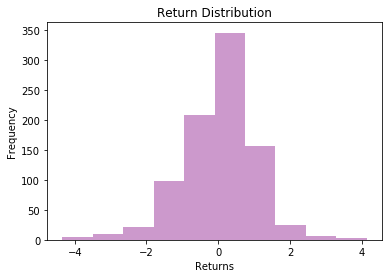

In [4]:
find_daily_stats(nifty_midcap)


<Figure size 432x288 with 0 Axes>

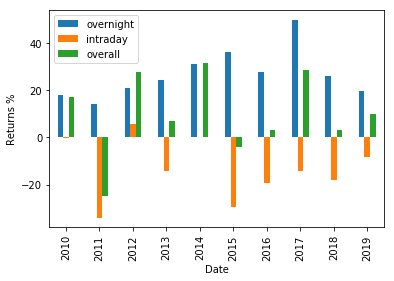

In [21]:
# def overnight_returns
df=nifty50.copy()
df.drop(columns=['High','Low','Volume','Turnover'],inplace=True)
df['overall']=(df['Close']/df['Close'].shift(1))-1
df['intraday']=(df['Close']/df['Open'])-1
df['overnight']= ((1+df['overall'])/(1+df['intraday']))-1
df=df.dropna()
df.index= pd.to_datetime(df.index)
df[['overnight','intraday','overall']]=df[['overnight','intraday','overall']].apply(lambda x: x+1)
df=df.groupby(df.index.year).prod().apply(lambda x:x-1)
df=np.round(df[['overnight','intraday','overall']]*100,2)
plt.figure()
df.plot.bar()
plt.ylabel('Returns %')
plt.savefig('/Users/JP/Desktop/test.png')


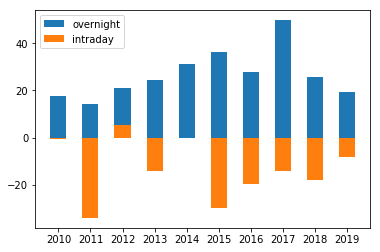

,overnight,intraday,overall
Date,,,
2010,17.79,-0.47,17.25
2011,14.09,-33.93,-24.62
2012,20.96,5.57,27.70
2013,24.45,-14.22,6.76
2014,31.25,0.10,31.39
2015,36.34,-29.63,-4.06
2016,27.77,-19.37,3.01
2017,49.73,-14.08,28.65
2018,25.82,-18.01,3.15


In [23]:
width=0.5
plt.bar(df.index,df['overnight'].values,label='overnight',width=width)
plt.bar(df.index,df['intraday'].values,label='intraday',width=width)
plt.legend()
plt.xticks(df.index)
plt.show()
df



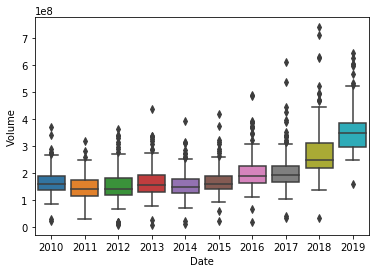

In [62]:
df=nifty50.copy()
df=df[['Close','Volume']]
df['%']=df['Close'].pct_change(1)
df=df.dropna()
# plt.subplot(1,2,1)
# sns.distplot(df['%'],bins=10,kde=False)
# plt.subplot(1,2,2)
volume_plot = sns.boxplot(x=pd.to_datetime(df.index).year,y=df['Volume'])



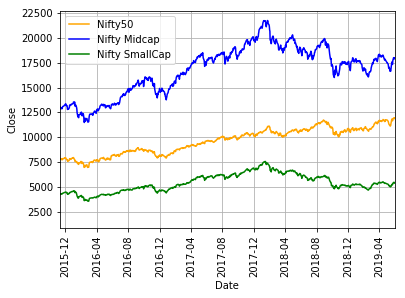

In [97]:
sns.lineplot(y='Close',x=nifty50.index,data=nifty50,color='orange',label='Nifty50')
sns.lineplot(y='Close',x=nifty_midcap.index,data=nifty_midcap,color='blue',label='Nifty Midcap')
sns.lineplot(y='Close',x=nifty_smallcap.index,data=nifty_smallcap,color='green',label='Nifty SmallCap')
plt.xlim([nifty_midcap.index[0],nifty_midcap.index[-1]])
plt.legend()
plt.xticks(rotation=90)
plt.plot()
plt.grid()


,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2010-01-04,5200.90,5238.45,5167.10,5232.20,148652424,6.531610e+10
2010-01-05,5277.15,5288.35,5242.40,5277.90,240844424,7.969620e+10
2010-01-06,5278.15,5310.85,5260.05,5281.80,216147837,7.892600e+10
2010-01-07,5281.80,5302.55,5244.75,5263.10,181246734,6.890990e+10
2010-01-08,5264.25,5276.75,5234.70,5244.75,201910800,7.777040e+10
2010-01-11,5263.80,5287.20,5227.80,5249.40,238011959,1.108055e+11
2010-01-12,5251.10,5300.50,5200.95,5210.40,206748015,8.648490e+10
2010-01-13,5212.60,5239.20,5169.55,5233.95,200774550,8.430480e+10
2010-01-14,5234.50,5272.85,5232.50,5259.90,171282618,7.824430e+10
